# COCOMO (Constructive Cost Model)

proposed by Barry Boehm in 1981 and is based on the study of 63 projects.
https://en.wikipedia.org/wiki/Barry_Boehm

The key parameters which define the quality of any software products, which are also an outcome of the Cocomo are:
* Effort: Amount of labor that will be required to complete a task. It is measured in person-months.
* Schedule: The amount of time required for the completion of the job. It is measured in the units of time

The COCOMO models are defined for three classes of software projects. 

(1) organic: relatively small, simple software projects in which small teams with good application experience work to a set of less than rigid requirements (e.g., a thermal analysis program developed for a heat transfer group). The problem is well understood and has been solved in the past.

(2) semi-detached: an intermediate (in size and complexity) software project in which teams with mixed experience levels must meet a mix of rigid and less than rigid requirements (e.g., a transaction processing system with fixed requirements for terminal hardware and data base software). Compilers or different Embedded Systems can be considered Semi-Detached types.

(3) embedded: a software project that must be developed within a set of tight hardware, software and operational constraints (e.g., flight control software for aircraft). highest level of complexity, creativity, and experience.

source: https://github.com/vijaynitrr/cocomo and
https://www.geeksforgeeks.org/software-engineering-cocomo-model/

The Basic COCOMO equations take the form:
$$
E = a * KLOC^b
$$
and
$$
D = c * E^d
$$
where $E$ is the effort applied in person-months, $D$ is the development time in chronological months and KLOC is the estimated number of delivered lines of code for the project (express in thousands).

Dr. Barry Boehm says that, by default, the confidence interval of COCOMO II model is +/-25%.

*source: https://stackoverflow.com/a/38137147/1164295*

In [1]:
error_percentage = 0.25

The model is a combination of formulas and experimentally-determined parameters

In [2]:
import math

In [3]:
def calculate_cocomo(kloc:int, a: float, b: float, c: float, d: float) -> float:
    """
    from https://github.com/vijaynitrr/cocomo/blob/master/cocomo_code.py#L37
    """
    effort = a * math.pow(kloc, b) # person-months
    development_time = c * math.pow(effort, d) # months
    staff_count = effort/development_time
    return staff_count, development_time

In [4]:
# Fitting parameter values are from 
# https://github.com/vijaynitrr/cocomo/blob/master/cocomo_code.py#L17
modes = {"organic":       {'a': 2.4, 'b': 1.05, 'c': 2.5, 'd': 0.38},
         "semi-detached": {'a': 3.0, 'b': 1.12, 'c': 2.5, 'd': 0.35},
         "embedded":      {'a': 3.6, 'b': 1.20, 'c': 2.5, 'd': 0.32}
        }

Do the calculation for a user-defined set of input values

In [5]:
kloc = 500 # thousands of lines of source code
which_mode = "organic"

number_of_developer_FTEs, months = calculate_cocomo(kloc, 
                                            modes[which_mode]['a'],
                                            modes[which_mode]['b'],
                                            modes[which_mode]['c'],
                                            modes[which_mode]['d'])

print(which_mode,'project:',
      round((months*(1-error_percentage))/12,1),'to',
      round((months*(1+error_percentage))/12,1),'years (an average of',
      round(months/12,1),'years) for',
      round(number_of_developer_FTEs,1),'developers to write',
      kloc*1000,'lines of code')

organic project: 2.6 to 4.3 years (an average of 3.5 years) for 39.3 developers to write 500000 lines of code


# visualize trends

In [6]:
from matplotlib import pyplot as plt
import matplotlib
import pandas
import sys

In [7]:
print('python    ',sys.version)
print('matplotlib',matplotlib.__version__)
print('pandas    ',pandas.__version__)

python     3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]
matplotlib 3.6.2
pandas     1.5.2


In [8]:
list_of_dicts = []
for mode in modes.keys():
    for kloc in range(100,1001,100):
        dev_count, months = calculate_cocomo(kloc, 
                                            modes[mode]['a'],
                                            modes[mode]['b'],
                                            modes[mode]['c'],
                                            modes[mode]['d'])
        this_dict = {'mode': mode, 
                     'kloc': kloc, 
                     'developer count': dev_count,
                     'months average': months,
                     'months upper error':months*(1+error_percentage),
                     'months lower error':months*(1-error_percentage)}
        list_of_dicts.append(this_dict)

In [9]:
df = pandas.DataFrame(list_of_dicts)

In [10]:
df.head()

,mode,kloc,developer count,months average,months upper error,months lower error
0,organic,100,13.797200,21.898798,27.373498,16.424099
1,organic,200,21.665139,28.875615,36.094519,21.656712
2,organic,300,28.209598,33.946239,42.432798,25.459679
3,organic,400,34.019820,38.075202,47.594003,28.556402
4,organic,500,39.338739,41.620693,52.025867,31.215520


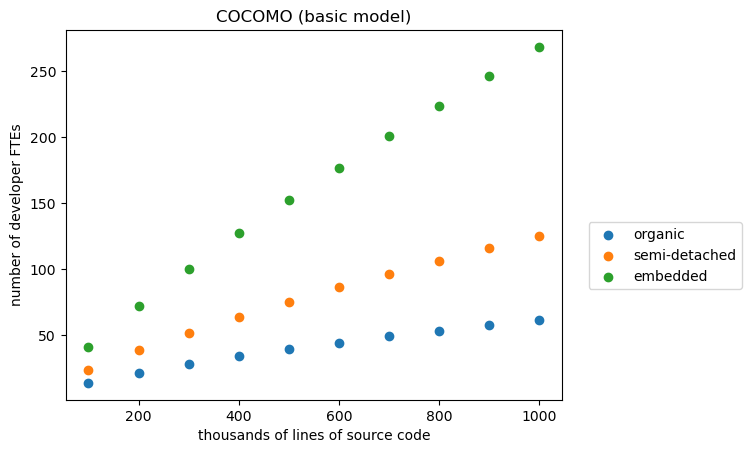

In [11]:
for mode in modes.keys():
    plt.scatter(x=df[df['mode']==mode]['kloc'],
                y=df[df['mode']==mode]['developer count'],
               label=mode);
plt.xlabel('thousands of lines of source code');
plt.ylabel('number of developer FTEs');
plt.legend(bbox_to_anchor=(1.04, .5), loc="upper left");
plt.title('COCOMO (basic model)');

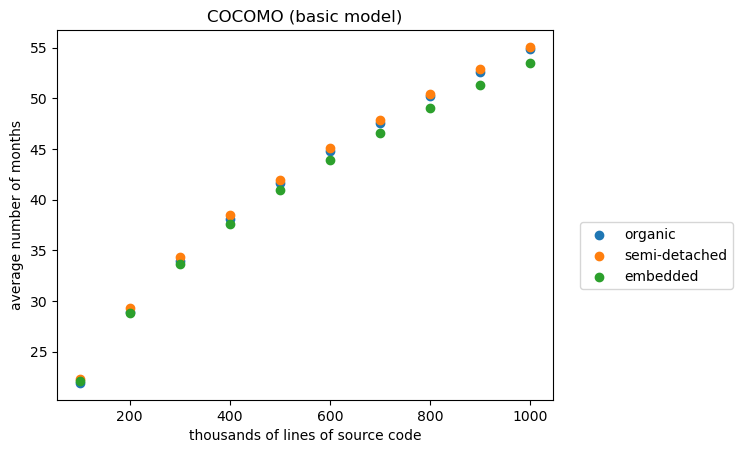

In [12]:
for mode in modes.keys():
    plt.scatter(x=df[df['mode']==mode]['kloc'],
                y=df[df['mode']==mode]['months average'],
               label=mode);
plt.xlabel('thousands of lines of source code');
plt.ylabel('average number of months');
plt.legend(bbox_to_anchor=(1.04, .5), loc="upper left");
plt.title('COCOMO (basic model)');

# Intermediate COCOMO

https://en.wikipedia.org/wiki/COCOMO#Intermediate_COCOMO

In [13]:
def intermediate_cocomo(kloc:int, 
                        a: float, b: float, c: float, d: float, 
                        EAF: float) -> float:
    """
    from https://en.wikipedia.org/wiki/COCOMO#Intermediate_COCOMO
    
    EAF = effort adjustment factor
    """
    effort = a * math.pow(kloc, b) * EAF # effort applied in person-months
    development_time = c * math.pow(effort, d) # months
    staff_count = effort/development_time
    return staff_count, development_time


In [14]:
modes_for_intermediate = {"organic":       {'a': 3.2, 'b': 1.05, 'c': 2.5, 'd': 0.38},
                          "semi-detached": {'a': 3.0, 'b': 1.12, 'c': 2.5, 'd': 0.35},
                          "embedded":      {'a': 2.8, 'b': 1.20, 'c': 2.5, 'd': 0.32}
                         }

Do the calculation for a user-defined set of input values

In [15]:
kloc = 500 # thousands of lines of source code
which_mode = "organic"
EAF = 1 # TODO: this value is the product of 15 parameters; see https://en.wikipedia.org/wiki/COCOMO#Intermediate_COCOMOs

number_of_developer_FTEs, months = intermediate_cocomo(kloc, 
                                            modes_for_intermediate[which_mode]['a'],
                                            modes_for_intermediate[which_mode]['b'],
                                            modes_for_intermediate[which_mode]['c'],
                                            modes_for_intermediate[which_mode]['d'],
                                            EAF)

print("using Intermediate COCOMO,")
print(which_mode,'project:',
      round((months*(1-error_percentage))/12,1),'to',
      round((months*(1+error_percentage))/12,1),'years (an average of',
      round(months/12,1),'years) for',
      round(number_of_developer_FTEs,1),'developers to write',
      kloc*1000,'lines of code')

using Intermediate COCOMO,
organic project: 2.9 to 4.8 years (an average of 3.9 years) for 47.0 developers to write 500000 lines of code


# Alternatives to COCOMO

Models:

* The Planning Game
* COCOMO / COCOMO II -- see online calculator http://softwarecost.org/tools/COCOMO/
* SLIM
* SEER-SEM
* Weighted Micro Function Points (as used by http://www.projectcodemeter.com)
* Program Evaluation and Review Technique
* PRICE Systems
* Wideband Delphi
* Function Point Analysis
* Evidence-based Scheduling
* REVIC model


Methods:
* Expert Judgment Method
* Analogy Method
* Parametric / Algorithmic Method
* Bottom-Up/Work Breakdown Structure Method
* Top-Down Method
* Analysis Effort Method
* Proxy-Based Estimation Method

Source: https://stackoverflow.com/questions/4879182/what-are-some-of-the-software-cost-estimation-methods-and-models